In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [5]:
path = 'train.csv'
data = pd.read_csv(path, names=['un','Pair','Outcome category','Filename','geo_extent','opacity','sub_geo','sub_opacity'],header=0)
data.head(10)

,un,Pair,Outcome category,Filename,geo_extent,opacity,sub_geo,sub_opacity
0,0,1.0,Worse,8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg,0.948288,1.000328,0.590273,0.371880
1,2,2.0,Worse,F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg,4.653521,3.334674,1.639015,1.032601
2,4,3.0,Worse,7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg,2.286859,1.843645,0.718910,0.452923
3,6,4.0,Worse,B85CA507-9EE2-497F-AA1E-32B82F75FB54.jpeg,3.917807,2.871164,2.198141,1.384858
4,8,5.0,Improved,171CB377-62FF-4B76-906C-F3787A01CB2E-2048x1475...,6.115947,4.256022,-1.528527,-0.962992
5,10,6.0,Worse,5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg,4.587421,3.293030,-0.420618,-0.264995
6,12,7.0,Worse,B2D20576-00B7-4519-A415-72DE29C90C34.jpeg,5.226992,3.695968,0.864569,0.544690
7,14,8.0,Worse,m1.png,2.745918,2.132858,-0.643764,-0.405580
8,16,9.0,Stable,m2.png,2.102154,1.727279,0.850338,0.535724
9,18,10.0,Stable,m3.png,2.952492,2.263003,0.420448,0.264888


<AxesSubplot:xlabel='opacity', ylabel='Outcome category'>

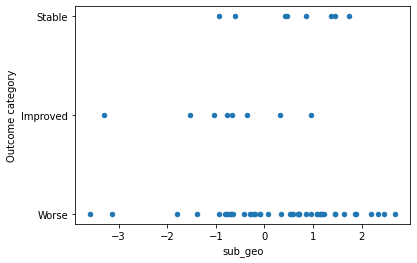

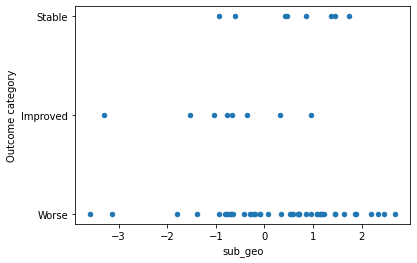

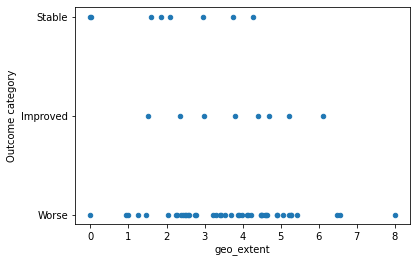

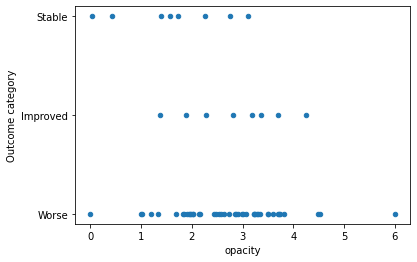

In [7]:
# 绘制数据散点图
data.plot(kind = 'scatter', x = 'sub_geo', y = 'Outcome category')
data.plot(kind = 'scatter', x = 'sub_geo', y = 'Outcome category')
data.plot(kind = 'scatter', x = 'geo_extent', y = 'Outcome category')
data.plot(kind = 'scatter', x = 'opacity', y = 'Outcome category')


In [8]:
# Label
def outcome_type(s):
    class_label = {'Worse':0, 'Stable':1, 'Improved':2}
    return class_label[s]

In [9]:
Data = pd.read_csv(path, names=['un','Pair','Outcome category','Filename','geo_extent','opacity','sub_geo','sub_opacity'],header=0, converters = {2:outcome_type})
Data.head(10)


,un,Pair,Outcome category,Filename,geo_extent,opacity,sub_geo,sub_opacity
0,0,1.0,0,8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg,0.948288,1.000328,0.590273,0.371880
1,2,2.0,0,F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg,4.653521,3.334674,1.639015,1.032601
2,4,3.0,0,7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg,2.286859,1.843645,0.718910,0.452923
3,6,4.0,0,B85CA507-9EE2-497F-AA1E-32B82F75FB54.jpeg,3.917807,2.871164,2.198141,1.384858
4,8,5.0,2,171CB377-62FF-4B76-906C-F3787A01CB2E-2048x1475...,6.115947,4.256022,-1.528527,-0.962992
5,10,6.0,0,5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg,4.587421,3.293030,-0.420618,-0.264995
6,12,7.0,0,B2D20576-00B7-4519-A415-72DE29C90C34.jpeg,5.226992,3.695968,0.864569,0.544690
7,14,8.0,0,m1.png,2.745918,2.132858,-0.643764,-0.405580
8,16,9.0,1,m2.png,2.102154,1.727279,0.850338,0.535724
9,18,10.0,1,m3.png,2.952492,2.263003,0.420448,0.264888


In [15]:
# 变量初始化
# 最后一列为y，其余为x
cols = Data.shape[1] #列数 shape[0]行数 [1]列数
X = Data.iloc[:,6:cols]       #取前cols-1列，即输入向量
y = Data.iloc[:,2:3]    #取最后一列，即目标变量
X = np.array(X)
y = np.array(y)
y = y.flatten()       # 对y进行降维

In [28]:
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,y_train.shape


((42, 2), (42,))

In [29]:
# 调用sklearn逻辑回归LogisticRegression()函数
lr = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [30]:

print("训练集的准确率：%.3f" %lr.score(X_train, y_train))
print("测试集的准确率：%.3f" %lr.score(X_test, y_test))


训练集的准确率：0.714
测试集的准确率：0.722


In [31]:
y_hat = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_hat) #错误率，也就是np.average(y_test==y_hat)
print("模型正确率：%.3f" %accuracy)

模型正确率：0.722


In [40]:
for multi_class in ['ovr','multinomial']:
    for solver in ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga']:
        # if (multi_class == 'multinomial' and solver == 'liblinear'):
        #             continue
        # 调用sklearn逻辑回归LogisticRegression()函数
        lr = LogisticRegression(penalty='l2',solver=solver,multi_class=multi_class)
        lr.fit(X_train,y_train)
        print("训练集的准确率：%.3f" %lr.score(X_train, y_train))
        print("测试集的准确率：%.3f" %lr.score(X_test, y_test))


训练集的准确率：0.714
测试集的准确率：0.722
训练集的准确率：0.714
测试集的准确率：0.722
训练集的准确率：0.714
测试集的准确率：0.722
训练集的准确率：0.714
测试集的准确率：0.722
训练集的准确率：0.714
测试集的准确率：0.722
训练集的准确率：0.714
测试集的准确率：0.722


ValueError: Solver liblinear does not support a multinomial backend.

In [47]:
data["Outcome category"].unique()

array(['Worse', 'Improved', 'Stable'], dtype=object)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
超参数： [0.01 0.01 0.01]
调用函数auc： 0.7977430555555556
手动计算auc： 0.7977430555555556


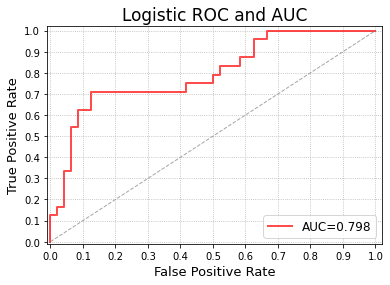

In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
 
if __name__ == '__main__':
    np.random.seed(0)
    data = pd.read_csv(path, header = 0)  #读取数据
    iris_types = data["Outcome category"].unique()
    n_class = iris_types.size
    x = data.iloc[:, 6:8]  #只取前面两个特征
    y = pd.Categorical(data["Outcome category"]).codes  #将标签转换0,1,...
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, random_state = 0)
    y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成类似二进制的编码
    alpha = np.logspace(-2, 2, 20)  #设置超参数范围
    model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
    model.fit(x_train, y_train)
    print ('超参数：', model.C_)
    # 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
    y_score = model.predict_proba(x_test)
    # 1、调用函数计算micro类型的AUC
    print ('调用函数auc：', metrics.roc_auc_score(y_one_hot, y_score, average='micro'))
    # 2、手动计算micro类型的AUC
    #首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print ('手动计算auc：', auc)
    #绘图
    mpl.rcParams['font.sans-serif'] = u'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    #FPR就是横坐标,TPR就是纵坐标
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(u'Logistic ROC and AUC', fontsize=17)
    plt.show()


1 of kfold 5
超参数： [0.01 0.01 0.01]
调用函数auc： 0.8368055555555556
手动计算auc： 0.8368055555555556
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


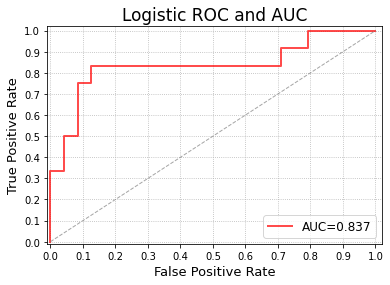


1 of kfold 5
超参数： [0.01 0.01 0.01]
调用函数auc： 0.7465277777777777
手动计算auc： 0.7465277777777777
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


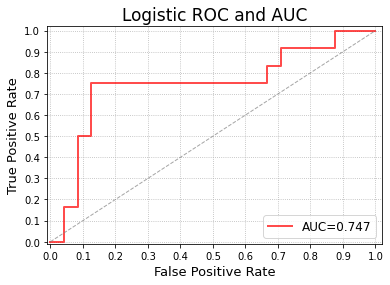


1 of kfold 5
超参数： [0.01 0.01 0.01]
调用函数auc： 0.6631944444444444
手动计算auc： 0.6631944444444444
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


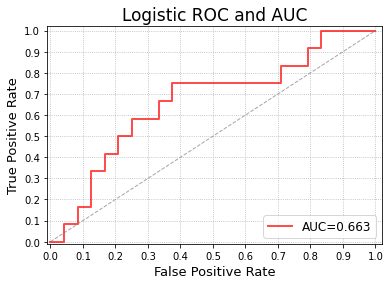


1 of kfold 5
超参数： [0.01 0.01 0.01]
调用函数auc： 0.8819444444444445
手动计算auc： 0.8819444444444445
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


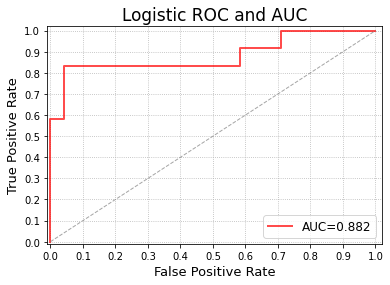


1 of kfold 5
超参数： [0.01 0.01 0.01]
调用函数auc： 0.8333333333333334
手动计算auc： 0.8333333333333334
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


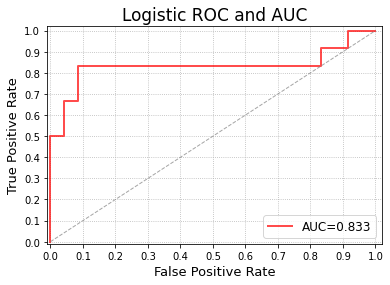

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold
 
if __name__ == '__main__':
    np.random.seed(0)
    data = pd.read_csv(path, header = 0)  #读取数据
    iris_types = data["Outcome category"].unique()
    n_class = iris_types.size
    x = data.iloc[:, 6:8]  #只取前面两个特征
    y = pd.Categorical(data["Outcome category"]).codes  #将标签转换0,1,...
    kf = KFold(n_splits=5, random_state=None)
    i = 1
    a_mean = [];p_mean=[];r_mean=[];f1_mean=[];roc_mean=[]
    for train_index, test_index in kf.split(x,y):
        print('\n{} of kfold {}'.format(i, kf.n_splits))
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成类似二进制的编码
        alpha = np.logspace(-2, 2, 20)  #设置超参数范围
        model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
        model.fit(x_train, y_train)
        print ('超参数：', model.C_)
        # 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
        y_score = model.predict_proba(x_test)
        # 1、调用函数计算micro类型的AUC
        print ('调用函数auc：', metrics.roc_auc_score(y_one_hot, y_score, average='micro'))
        # 2、手动计算micro类型的AUC
        #首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
        fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
        auc = metrics.auc(fpr, tpr)
        print ('手动计算auc：', auc)
        #绘图
        mpl.rcParams['font.sans-serif'] = u'SimHei'
        mpl.rcParams['axes.unicode_minus'] = False
        #FPR就是横坐标,TPR就是纵坐标
        plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
        plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
        plt.xlim((-0.01, 1.02))
        plt.ylim((-0.01, 1.02))
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.xlabel('False Positive Rate', fontsize=13)
        plt.ylabel('True Positive Rate', fontsize=13)
        plt.grid(b=True, ls=':')
        plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
        plt.title(u'Logistic ROC and AUC', fontsize=17)
        plt.show()